### Week 10-5 CNN을 이용한 감성 분석 - 한글

In [1]:
# 데이터 읽기

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

os.chdir(r'C:\Users\USER\kjw\LG전자_25\Week10')
review_df=pd.read_csv("thinq_review_result.csv")

review_df

date  star  like  \
0      2021년 09월 05일     1  36.0   
1      2021년 09월 06일     1  15.0   
2      2021년 09월 05일     1   8.0   
3      2021년 09월 06일     2   2.0   
4      2021년 09월 07일     1   NaN   
...              ...   ...   ...   
11374  2019년 02월 23일     5   NaN   
11375  2019년 03월 07일     5   NaN   
11376  2019년 03월 03일     5   NaN   
11377  2019년 03월 27일     5   NaN   
11378  2019년 02월 26일     5   NaN   

                                                 comment  \
0      추가정보등록은 앱설정에서 충분히 할수있음에도 굳이 기기화면마다 상단배치하여 끈질기게...   
1      그냥 엘지제품은 리모컨만 사용하는것이 정신 건강에 좋을 듯합니다 앱에서 제품삭제하고...   
2      퓨리케어 공기청정기 1단짜리 사용 중인데 언제부터 어플에서 공기청정기 수치 표시가 ...   
3      에너지모니터링 . 지난달 대비 사용량... 이전달하고 이번달하고 바꼈다. 보기는 했...   
4      LG엡만.서비스오작동기능들이잘안되고짜증나네.통신사이동하고삼성단말기로교체해야것네. 별...   
...                                                  ...   
11374                                            좋아요....   
11375                                             좋아요~~~   
11376                                             굿뜨~~~♡   
11377                                                굿~~   
11378                                           좋아요👍👍👍👍👍   

                                               comment_n  \
0      [['추가', '정보', '등록', '앱', '설정', '충분하다', '굳이', '...   
1      [['그냥', '엘지', '제품', '리모컨', '사용', '정신', '건강', '...   
2      [['퓨리', '케어', '공기청정기', '단', '짜다', '사용', '중', '...   
3      [['에너지', '모니터링', '지난달', '대비', '용량', '전달', '달',...   
4      [['LG', '옙', '서비스', '작동', '기능', '자다', '짜증', '나...   
...                                                  ...   
11374                                           [['좋다']]   
11375                                           [['좋다']]   
11376                                            [['굿']]   
11377                                            [['굿']]   
11378                                           [['좋다']]   

                                         comment_n_spell  
0      ['추가 정보 등록은 앱 설정에서 충분히 할 수 있음에도 굳이 기기 화면마다 상단 ...  
1      ['그냥 엘지 제품은 리모컨만 사용하는 것이 정신 건강에 좋을 듯합니다', '앱에서...  
2      ['퓨리 케어 공기청정기 단짜리 사용 중인데 언제부터 어플에서 공기청정기 수치 표시...  
3      ['에너지 모니터링 지난달 대비 사용량 이 전달하고 이번 달하고 바뀌었다', '보기...  
4      ['LG 옙만 서비스 오작동 기능들이 잘 안되고 짜증 나네', '통신사 이동하고 삼...  
...                                                  ...  
11374                                           ['좋아요 ']  
11375                                           ['좋아요 ']  
11376                                              ['굿']  
11377                                             ['굿 ']  
11378                                           ['좋아요 ']  

[11379 rows x 6 columns]

In [2]:
# 목표 변수 만들기(이전 예제와 동일)
del_index=review_df[review_df['star']==3].index
review_df.drop(del_index,axis=0,inplace=True)
review_df.shape

(10599, 6)

In [3]:
review_df['sentiment']=review_df['star'].apply(lambda x: 1 if x>=4 else 0)
review_df

date  star  like  \
0      2021년 09월 05일     1  36.0   
1      2021년 09월 06일     1  15.0   
2      2021년 09월 05일     1   8.0   
3      2021년 09월 06일     2   2.0   
4      2021년 09월 07일     1   NaN   
...              ...   ...   ...   
11374  2019년 02월 23일     5   NaN   
11375  2019년 03월 07일     5   NaN   
11376  2019년 03월 03일     5   NaN   
11377  2019년 03월 27일     5   NaN   
11378  2019년 02월 26일     5   NaN   

                                                 comment  \
0      추가정보등록은 앱설정에서 충분히 할수있음에도 굳이 기기화면마다 상단배치하여 끈질기게...   
1      그냥 엘지제품은 리모컨만 사용하는것이 정신 건강에 좋을 듯합니다 앱에서 제품삭제하고...   
2      퓨리케어 공기청정기 1단짜리 사용 중인데 언제부터 어플에서 공기청정기 수치 표시가 ...   
3      에너지모니터링 . 지난달 대비 사용량... 이전달하고 이번달하고 바꼈다. 보기는 했...   
4      LG엡만.서비스오작동기능들이잘안되고짜증나네.통신사이동하고삼성단말기로교체해야것네. 별...   
...                                                  ...   
11374                                            좋아요....   
11375                                             좋아요~~~   
11376                                             굿뜨~~~♡   
11377                                                굿~~   
11378                                           좋아요👍👍👍👍👍   

                                               comment_n  \
0      [['추가', '정보', '등록', '앱', '설정', '충분하다', '굳이', '...   
1      [['그냥', '엘지', '제품', '리모컨', '사용', '정신', '건강', '...   
2      [['퓨리', '케어', '공기청정기', '단', '짜다', '사용', '중', '...   
3      [['에너지', '모니터링', '지난달', '대비', '용량', '전달', '달',...   
4      [['LG', '옙', '서비스', '작동', '기능', '자다', '짜증', '나...   
...                                                  ...   
11374                                           [['좋다']]   
11375                                           [['좋다']]   
11376                                            [['굿']]   
11377                                            [['굿']]   
11378                                           [['좋다']]   

                                         comment_n_spell  sentiment  
0      ['추가 정보 등록은 앱 설정에서 충분히 할 수 있음에도 굳이 기기 화면마다 상단 ...          0  
1      ['그냥 엘지 제품은 리모컨만 사용하는 것이 정신 건강에 좋을 듯합니다', '앱에서...          0  
2      ['퓨리 케어 공기청정기 단짜리 사용 중인데 언제부터 어플에서 공기청정기 수치 표시...          0  
3      ['에너지 모니터링 지난달 대비 사용량 이 전달하고 이번 달하고 바뀌었다', '보기...          0  
4      ['LG 옙만 서비스 오작동 기능들이 잘 안되고 짜증 나네', '통신사 이동하고 삼...          0  
...                                                  ...        ...  
11374                                           ['좋아요 ']          1  
11375                                           ['좋아요 ']          1  
11376                                              ['굿']          1  
11377                                             ['굿 ']          1  
11378                                           ['좋아요 ']          1  

[10599 rows x 7 columns]

<AxesSubplot:>

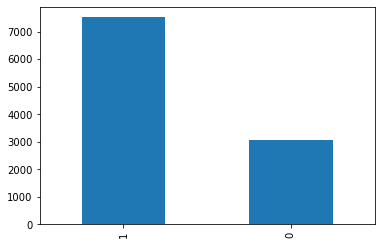

In [4]:
# 목표 변수 분포
review_df['sentiment'].value_counts().plot(kind='bar')

In [5]:
# 성능 평가 함수(앞과 동일)

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score 
from sklearn.metrics import recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test=None, pred=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(review_df['comment'], review_df['sentiment'], test_size=0.3, random_state=156)

X_train.shape, X_test.shape

((7419,), (3180,))

In [7]:
# 훈련 데이터 리뷰 단어 수 분포

train_word_counts = X_train.apply(lambda x:len(x.split(' ')))

print('리뷰 단어 개수 최대 값: {}'.format(np.max(train_word_counts)))
print('리뷰 단어 개수 최소 값: {}'.format(np.min(train_word_counts)))
print('리뷰 단어 개수 평균 값: {:.2f}'.format(np.mean(train_word_counts)))
print('리뷰 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('리뷰 단어 개수 중간 값: {}'.format(np.median(train_word_counts)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('리뷰 단어 개수 제 1 사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('리뷰 단어 개수 제 3 사분위: {}'.format(np.percentile(train_word_counts, 75)))

리뷰 단어 개수 최대 값: 83
리뷰 단어 개수 최소 값: 1
리뷰 단어 개수 평균 값: 7.83
리뷰 단어 개수 표준편차: 10.59
리뷰 단어 개수 중간 값: 4.0
리뷰 단어 개수 제 1 사분위: 1.0
리뷰 단어 개수 제 3 사분위: 10.0


C:\Users\USER\AppData\Local\Temp/ipykernel_29920/988694724.py:6: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('log', nonposy='clip')


Text(0, 0.5, 'Number of reviews')

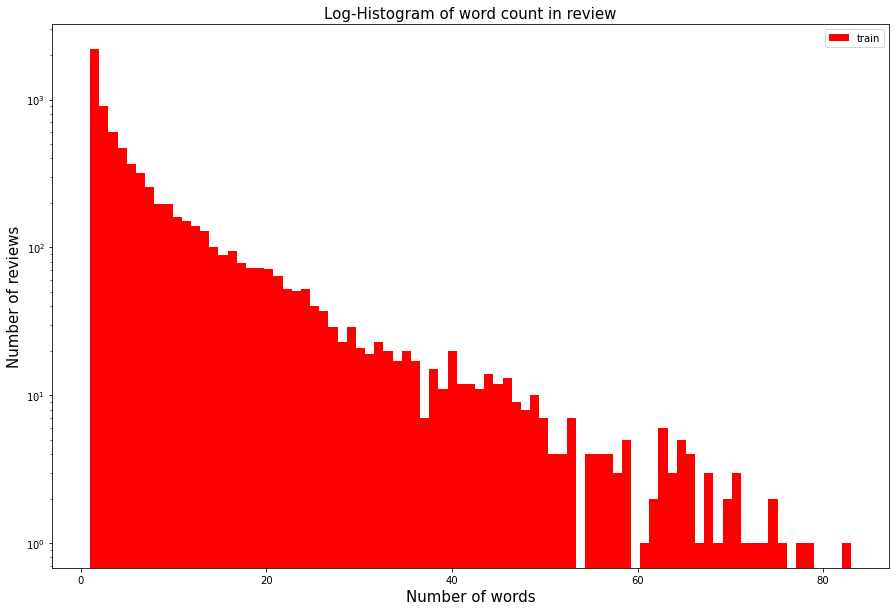

In [8]:
# 리뷰 단어 수 분포

plt.figure(figsize=(15, 10))
plt.hist(train_word_counts, bins=83, facecolor='r',label='train')
plt.title('Log-Histogram of word count in review', fontsize=15)
plt.yscale('log', nonposy='clip')
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Number of reviews', fontsize=15)

In [9]:
# traning data encoding
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer


tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
text_sequences = tokenizer.texts_to_sequences(X_train)
print(text_sequences[0])

word_vocab = tokenizer.word_index
word_vocab["<PAD>"] = 0

print("전체 단어 개수: ", len(word_vocab))

word_vocab

data_configs = {}

data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab)

[15]
전체 단어 개수:  21901


In [10]:
MAX_SEQUENCE_LENGTH = 83 
train_inputs = pad_sequences(text_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
print('Shape of train data: ', train_inputs.shape)

# 레이블 정보를 numpy 배열로
train_labels = np.array(y_train)
print('Shape of label tensor:', train_labels.shape)

Shape of train data:  (7419, 83)
Shape of label tensor: (7419,)


In [11]:
# test data encoding
text_sequences = tokenizer.texts_to_sequences(X_test)
test_inputs = pad_sequences(text_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
print('Shape of test data: ', test_inputs.shape)

# 레이블 정보를 numpy 배열로
test_labels = np.array(y_test)
print('Shape of label tensor:', test_labels.shape)

Shape of test data:  (3180, 83)
Shape of label tensor: (3180,)


In [12]:
# CNN Packages

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import layers

In [13]:
# 랜덤 시드 고정

SEED_NUM = 1234
tf.random.set_seed(SEED_NUM)

In [14]:
# 모델 하이퍼파라미터 정의
model_name = 'cnn_classifier_en'
BATCH_SIZE = 512
NUM_EPOCHS = 10
VALID_SPLIT = 0.1
MAX_LEN = train_inputs.shape[1]

kargs = {'model_name': model_name,
        'vocab_size': data_configs['vocab_size'],
        'embedding_size': 128,
        'num_filters': 100,
        'dropout_rate': 0.5,
        'hidden_dimension': 250,
        'output_dimension':1}

In [15]:
# 클래스 형태로 모형 정의하기

class CNNClassifier(tf.keras.Model):
    
    def __init__(self, **kargs):
        super(CNNClassifier, self).__init__(name=kargs['model_name'])
        self.embedding = layers.Embedding(input_dim=kargs['vocab_size'],
                                     output_dim=kargs['embedding_size'])
        self.conv_list = [layers.Conv1D(filters=kargs['num_filters'],
                                   kernel_size=kernel_size,
                                   padding='valid',
                                   activation=tf.keras.activations.relu,
                                   kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.))
                     for kernel_size in [3,4,5]]
        self.pooling = layers.GlobalMaxPooling1D()
        self.dropout = layers.Dropout(kargs['dropout_rate'])
        self.fc1 = layers.Dense(units=kargs['hidden_dimension'],
                           activation=tf.keras.activations.relu,
                           kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.))
        self.fc2 = layers.Dense(units=kargs['output_dimension'],
                           activation=tf.keras.activations.sigmoid,
                           kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.))
    def call(self, x):
        x = self.embedding(x)
        x = self.dropout(x)
        x = tf.concat([self.pooling(conv(x)) for conv in self.conv_list], axis=-1)
        x = self.fc1(x)
        x = self.fc2(x)
        return x

In [16]:
# 모형 생성과 학습 정의

model = CNNClassifier(**kargs)
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')])

In [ ]:
# 체크포인트 정의

In [17]:
DATA_OUT_PATH = './data_out/'
earlystop_callback = EarlyStopping(monitor='val_accuracy', min_delta=0.0001,patience=2)

checkpoint_path = DATA_OUT_PATH + model_name + '/weights.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)

if os.path.exists(checkpoint_dir):
    print("{} -- Folder already exists \n".format(checkpoint_dir))
else:
    os.makedirs(checkpoint_dir, exist_ok=True)
    print("{} -- Folder create complete \n".format(checkpoint_dir))

./data_out/cnn_classifier_en -- Folder already exists 



In [18]:
cp_callback = ModelCheckpoint(
    checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True)

In [19]:
# 모델 학습
history = model.fit(train_inputs, train_labels, batch_size=BATCH_SIZE, 
                    epochs=NUM_EPOCHS, validation_split=VALID_SPLIT, 
                    callbacks=[earlystop_callback, cp_callback])

Epoch 1/10
14/14 [==============================] - 4s 244ms/step - loss: 0.5855 - accuracy: 0.6814 - val_loss: 0.5648 - val_accuracy: 0.7951

Epoch 00001: val_accuracy improved from -inf to 0.79515, saving model to ./data_out/cnn_classifier_en\weights.h5
Epoch 2/10
14/14 [==============================] - 3s 235ms/step - loss: 0.4341 - accuracy: 0.8180 - val_loss: 0.4251 - val_accuracy: 0.8383

Epoch 00002: val_accuracy improved from 0.79515 to 0.83827, saving model to ./data_out/cnn_classifier_en\weights.h5
Epoch 3/10
14/14 [==============================] - 3s 238ms/step - loss: 0.3052 - accuracy: 0.8859 - val_loss: 0.3300 - val_accuracy: 0.8760

Epoch 00003: val_accuracy improved from 0.83827 to 0.87601, saving model to ./data_out/cnn_classifier_en\weights.h5
Epoch 4/10
14/14 [==============================] - 3s 241ms/step - loss: 0.2209 - accuracy: 0.9223 - val_loss: 0.2910 - val_accuracy: 0.8989

Epoch 00004: val_accuracy improved from 0.87601 to 0.89892, saving model to ./data_

In [20]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string], '')
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()


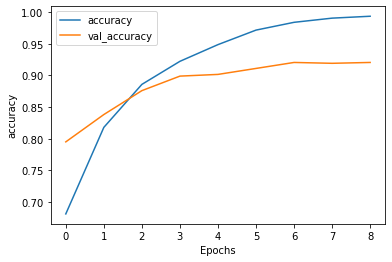

In [21]:
plot_graphs(history, 'accuracy')

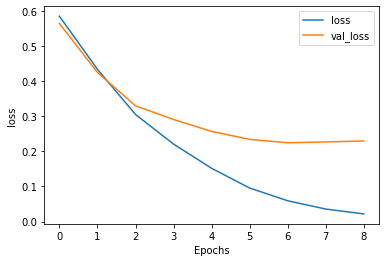

In [22]:
plot_graphs(history, 'loss')

In [23]:
# 베스트 모델 불러오기
SAVE_FILE_NM = 'weights.h5'

model.load_weights(os.path.join(DATA_OUT_PATH, model_name, SAVE_FILE_NM))

In [24]:
predictions = model.predict(test_inputs, batch_size=BATCH_SIZE)
predictions = predictions.squeeze(-1)

In [25]:
predictions

array([0.07827356, 0.9968723 , 0.98091274, ..., 0.18931615, 0.98996985,
       0.9603548 ], dtype=float32)

In [26]:
pred=[1 if predictions[i]> 0.5 else 0 for i in range(0,predictions.shape[0])]

In [27]:
get_clf_eval(y_test, pred)

오차 행렬
[[ 758  164]
 [ 121 2137]]
정확도: 0.9104, 정밀도: 0.9287, 재현율: 0.9464,    F1: 0.9375, AUC:0.8843


In [ ]:
## 전처리된 텍스트 사용

In [30]:
review_df['comment_n_str']=review_df['comment_n_spell'].apply(lambda x: ' '.join(eval(x)))

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(review_df['comment_n_str'], review_df['sentiment'], test_size=0.3, random_state=156)

X_train.shape, X_test.shape

((7419,), (3180,))

In [32]:
# 훈련 데이터 리뷰 단어 수 분포

train_word_counts = X_train.apply(lambda x:len(x.split(' ')))

print('리뷰 단어 개수 최대 값: {}'.format(np.max(train_word_counts)))
print('리뷰 단어 개수 최소 값: {}'.format(np.min(train_word_counts)))
print('리뷰 단어 개수 평균 값: {:.2f}'.format(np.mean(train_word_counts)))
print('리뷰 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('리뷰 단어 개수 중간 값: {}'.format(np.median(train_word_counts)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('리뷰 단어 개수 제 1 사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('리뷰 단어 개수 제 3 사분위: {}'.format(np.percentile(train_word_counts, 75)))

리뷰 단어 개수 최대 값: 94
리뷰 단어 개수 최소 값: 1
리뷰 단어 개수 평균 값: 10.27
리뷰 단어 개수 표준편차: 13.58
리뷰 단어 개수 중간 값: 5.0
리뷰 단어 개수 제 1 사분위: 2.0
리뷰 단어 개수 제 3 사분위: 13.0


C:\Users\USER\AppData\Local\Temp/ipykernel_29920/988694724.py:6: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('log', nonposy='clip')


Text(0, 0.5, 'Number of reviews')

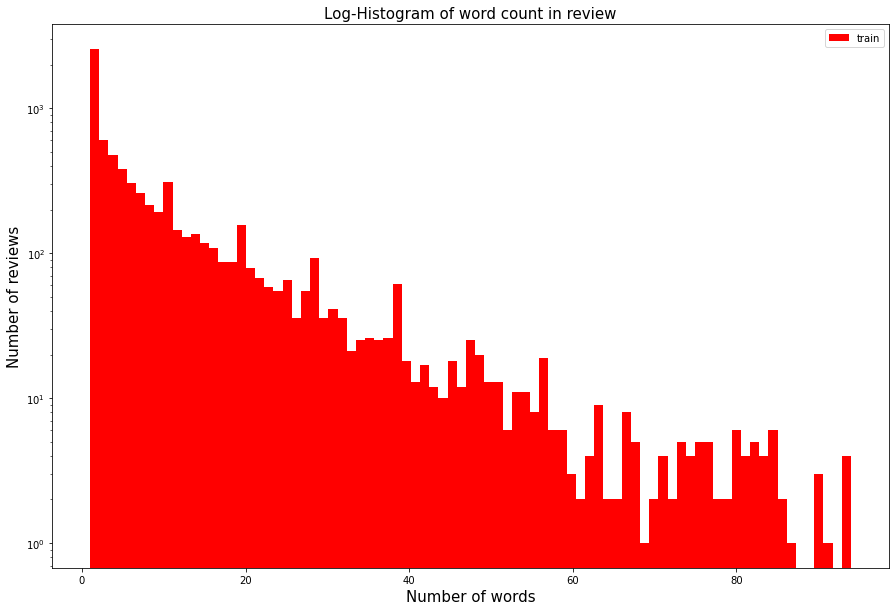

In [33]:
# 리뷰 단어 수 분포

plt.figure(figsize=(15, 10))
plt.hist(train_word_counts, bins=83, facecolor='r',label='train')
plt.title('Log-Histogram of word count in review', fontsize=15)
plt.yscale('log', nonposy='clip')
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Number of reviews', fontsize=15)

In [34]:
# traning data encoding
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer


tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
text_sequences = tokenizer.texts_to_sequences(X_train)
print(text_sequences[0])

word_vocab = tokenizer.word_index
word_vocab["<PAD>"] = 0

print("전체 단어 개수: ", len(word_vocab))

word_vocab

data_configs = {}

data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab)

[27]
전체 단어 개수:  16082


In [35]:
MAX_SEQUENCE_LENGTH = 94 
train_inputs = pad_sequences(text_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
print('Shape of train data: ', train_inputs.shape)

# 레이블 정보를 numpy 배열로
train_labels = np.array(y_train)
print('Shape of label tensor:', train_labels.shape)

Shape of train data:  (7419, 94)
Shape of label tensor: (7419,)


In [36]:
# test data encoding
text_sequences = tokenizer.texts_to_sequences(X_test)
test_inputs = pad_sequences(text_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
print('Shape of test data: ', test_inputs.shape)

# 레이블 정보를 numpy 배열로
test_labels = np.array(y_test)
print('Shape of label tensor:', test_labels.shape)

Shape of test data:  (3180, 94)
Shape of label tensor: (3180,)


In [37]:
# CNN Packages

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import layers

In [38]:
# 랜덤 시드 고정

SEED_NUM = 1234
tf.random.set_seed(SEED_NUM)

In [39]:
# 모델 하이퍼파라미터 정의
model_name = 'cnn_classifier_en'
BATCH_SIZE = 512
NUM_EPOCHS = 10
VALID_SPLIT = 0.1
MAX_LEN = train_inputs.shape[1]

kargs = {'model_name': model_name,
        'vocab_size': data_configs['vocab_size'],
        'embedding_size': 128,
        'num_filters': 100,
        'dropout_rate': 0.5,
        'hidden_dimension': 250,
        'output_dimension':1}

In [40]:
# 클래스 형태로 모형 정의하기

class CNNClassifier(tf.keras.Model):
    
    def __init__(self, **kargs):
        super(CNNClassifier, self).__init__(name=kargs['model_name'])
        self.embedding = layers.Embedding(input_dim=kargs['vocab_size'],
                                     output_dim=kargs['embedding_size'])
        self.conv_list = [layers.Conv1D(filters=kargs['num_filters'],
                                   kernel_size=kernel_size,
                                   padding='valid',
                                   activation=tf.keras.activations.relu,
                                   kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.))
                     for kernel_size in [3,4,5]]
        self.pooling = layers.GlobalMaxPooling1D()
        self.dropout = layers.Dropout(kargs['dropout_rate'])
        self.fc1 = layers.Dense(units=kargs['hidden_dimension'],
                           activation=tf.keras.activations.relu,
                           kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.))
        self.fc2 = layers.Dense(units=kargs['output_dimension'],
                           activation=tf.keras.activations.sigmoid,
                           kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.))
    def call(self, x):
        x = self.embedding(x)
        x = self.dropout(x)
        x = tf.concat([self.pooling(conv(x)) for conv in self.conv_list], axis=-1)
        x = self.fc1(x)
        x = self.fc2(x)
        return x

In [41]:
# 모형 생성과 학습 정의

model = CNNClassifier(**kargs)
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')])

In [42]:
# 체크포인트 정의

In [43]:
DATA_OUT_PATH = './data_out/'
earlystop_callback = EarlyStopping(monitor='val_accuracy', min_delta=0.0001,patience=2)

checkpoint_path = DATA_OUT_PATH + model_name + '/weights.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)

if os.path.exists(checkpoint_dir):
    print("{} -- Folder already exists \n".format(checkpoint_dir))
else:
    os.makedirs(checkpoint_dir, exist_ok=True)
    print("{} -- Folder create complete \n".format(checkpoint_dir))

./data_out/cnn_classifier_en -- Folder already exists 



In [44]:
cp_callback = ModelCheckpoint(
    checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True)

In [45]:
# 모델 학습
history = model.fit(train_inputs, train_labels, batch_size=BATCH_SIZE, 
                    epochs=NUM_EPOCHS, validation_split=VALID_SPLIT, 
                    callbacks=[earlystop_callback, cp_callback])

Epoch 1/10
14/14 [==============================] - 5s 290ms/step - loss: 0.5776 - accuracy: 0.6828 - val_loss: 0.5443 - val_accuracy: 0.8531

Epoch 00001: val_accuracy improved from -inf to 0.85310, saving model to ./data_out/cnn_classifier_en\weights.h5
Epoch 2/10
14/14 [==============================] - 4s 279ms/step - loss: 0.3865 - accuracy: 0.8573 - val_loss: 0.3740 - val_accuracy: 0.8598

Epoch 00002: val_accuracy improved from 0.85310 to 0.85984, saving model to ./data_out/cnn_classifier_en\weights.h5
Epoch 3/10
14/14 [==============================] - 4s 285ms/step - loss: 0.2609 - accuracy: 0.9018 - val_loss: 0.2889 - val_accuracy: 0.8895

Epoch 00003: val_accuracy improved from 0.85984 to 0.88949, saving model to ./data_out/cnn_classifier_en\weights.h5
Epoch 4/10
14/14 [==============================] - 4s 285ms/step - loss: 0.1943 - accuracy: 0.9292 - val_loss: 0.2654 - val_accuracy: 0.9016

Epoch 00004: val_accuracy improved from 0.88949 to 0.90162, saving model to ./data_

In [46]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string], '')
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()


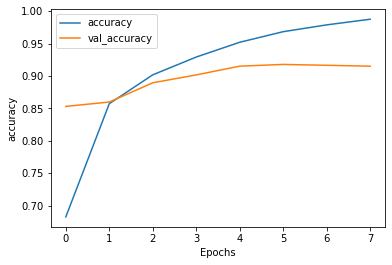

In [47]:
plot_graphs(history, 'accuracy')

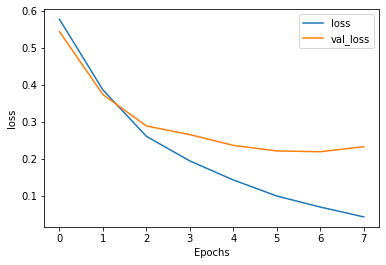

In [48]:
plot_graphs(history, 'loss')

In [49]:
# 베스트 모델 불러오기
SAVE_FILE_NM = 'weights.h5'

model.load_weights(os.path.join(DATA_OUT_PATH, model_name, SAVE_FILE_NM))

In [50]:
predictions = model.predict(test_inputs, batch_size=BATCH_SIZE)
predictions = predictions.squeeze(-1)

In [51]:
predictions

array([0.09888726, 0.99155456, 0.96981865, ..., 0.07260758, 0.98007554,
       0.9584907 ], dtype=float32)

In [52]:
pred=[1 if predictions[i]> 0.5 else 0 for i in range(0,predictions.shape[0])]

In [53]:
get_clf_eval(y_test, pred)

오차 행렬
[[ 803  119]
 [ 147 2111]]
정확도: 0.9164, 정밀도: 0.9466, 재현율: 0.9349,    F1: 0.9407, AUC:0.9029
